In [ ]:
import os

# List all files in the current directory to verify the upload
print(os.listdir())


['.config', 'sample_data']


In [ ]:
import pandas as pd


social_media_df = pd.read_csv("tweets.csv")

# Preview the DataFrame
print(social_media_df.head())


                                        Post Content  Likes  \
0  RT @henkbres: Ik ga iedere \ndag deze #hashtag...      0   
1  Just Started The Outrun &amp; It Starts Off Wi...      0   
2  RT @henkbres: Ik ga iedere \ndag deze #hashtag...      0   
3                   https://t.co/1jPcyPXamn #Hashtag      0   
4  RT @sharmasumit1008: #SI_भर्ती_2021 फर्जीवाड़ा...      0   

                       Comments  Shares (Retweets)  \
0  Not available in Twitter API                 41   
1  Not available in Twitter API                  0   
2  Not available in Twitter API                119   
3  Not available in Twitter API                  0   
4  Not available in Twitter API                172   

                                            Hashtags  
0       ['hashtag', 'RT', 'NEXIT', 'NUGRENZENDICHT']  
1  ['DEISlop', 'GoWokeGoBroke', 'Hashtag', 'Bring...  
2       ['hashtag', 'RT', 'NEXIT', 'NUGRENZENDICHT']  
3                                        ['Hashtag']  
4                    

In [ ]:
print(social_media_df.info())  # Summary of the data
print(social_media_df.head())  # First few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Post Content       100 non-null    object
 1   Likes              100 non-null    int64 
 2   Comments           100 non-null    object
 3   Shares (Retweets)  100 non-null    int64 
 4   Hashtags           100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB
None
                                        Post Content  Likes  \
0  RT @henkbres: Ik ga iedere \ndag deze #hashtag...      0   
1  Just Started The Outrun &amp; It Starts Off Wi...      0   
2  RT @henkbres: Ik ga iedere \ndag deze #hashtag...      0   
3                   https://t.co/1jPcyPXamn #Hashtag      0   
4  RT @sharmasumit1008: #SI_भर्ती_2021 फर्जीवाड़ा...      0   

                       Comments  Shares (Retweets)  \
0  Not available in Twitter API                 41   
1  Not available in Twitte

In [ ]:
print(social_media_df.isnull().sum())


Post Content         0
Likes                0
Comments             0
Shares (Retweets)    0
Hashtags             0
dtype: int64


In [ ]:
# Example: Fill missing Likes and Shares with 0
social_media_df["Likes"] = social_media_df["Likes"].fillna(0)
social_media_df["Shares(Retweets)"] = social_media_df["Shares (Retweets)"].fillna(0)
social_media_df["Post Content"] = social_media_df["Post Content"].fillna("No Content")


In [ ]:
import ast

# Convert stringified lists back to Python lists if needed
social_media_df["Hashtags"] = social_media_df["Hashtags"].apply(ast.literal_eval)

# Normalize hashtag text to lowercase
social_media_df["Hashtags"] = social_media_df["Hashtags"].apply(lambda x: [tag.lower() for tag in x])


In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s#@]", "", text)  # Remove special characters
    return text.strip()

social_media_df["Post Content"] = social_media_df["Post Content"].apply(clean_text)


In [ ]:
social_media_df.drop_duplicates(subset="Post Content", inplace=True)


In [ ]:
social_media_df.to_csv("cleaned_social_media_data.csv", index=False)
print("Cleaned data saved to cleaned_social_media_data.csv")


Cleaned data saved to cleaned_social_media_data.csv


In [ ]:
from collections import Counter

# Count hashtag occurrences
all_hashtags = [hashtag for hashtags in social_media_df["Hashtags"] for hashtag in hashtags]
hashtag_counts = Counter(all_hashtags)

# Top 10 hashtags
popular_hashtags = hashtag_counts.most_common(10)
print("Top Hashtags:", popular_hashtags)

# Average engagement per hashtag
hashtag_engagement = []
for hashtag, count in popular_hashtags:
    filtered_df = social_media_df[social_media_df["Hashtags"].apply(lambda x: hashtag in x)]
    avg_likes = filtered_df["Likes"].mean()
    avg_shares = filtered_df["Shares(Retweets)"].mean()
    hashtag_engagement.append((hashtag, avg_likes, avg_shares))

print("Hashtag Engagement:")
for h in hashtag_engagement:
    print(f"Hashtag: {h[0]}, Avg Likes: {h[1]:.2f}, Avg Shares: {h[2]:.2f}")


Top Hashtags: [('hashtag', 17), ('rt', 2), ('nexit', 2), ('nugrenzendicht', 2), ('smoking', 2), ('smokingfetish', 2), ('smoke', 2), ('woman', 2), ('لیڈر_کا_سوچ_اور_قوت_مدافعت', 2), ('meme', 2)]
Hashtag Engagement:
Hashtag: hashtag, Avg Likes: 5.76, Avg Shares: 17.71
Hashtag: rt, Avg Likes: 47.50, Avg Shares: 41.00
Hashtag: nexit, Avg Likes: 47.50, Avg Shares: 41.00
Hashtag: nugrenzendicht, Avg Likes: 47.50, Avg Shares: 41.00
Hashtag: smoking, Avg Likes: 0.00, Avg Shares: 22.50
Hashtag: smokingfetish, Avg Likes: 0.00, Avg Shares: 22.50
Hashtag: smoke, Avg Likes: 0.00, Avg Shares: 22.50
Hashtag: woman, Avg Likes: 0.00, Avg Shares: 22.50
Hashtag: لیڈر_کا_سوچ_اور_قوت_مدافعت, Avg Likes: 0.00, Avg Shares: 0.00
Hashtag: meme, Avg Likes: 0.00, Avg Shares: 0.00


In [ ]:
from textblob import TextBlob

# Add a sentiment score column
social_media_df["Sentiment"] = social_media_df["Post Content"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Correlation analysis
correlation = social_media_df[["Likes", "Shares(Retweets)", "Sentiment"]].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                      Likes  Shares(Retweets)  Sentiment
Likes             1.000000         -0.008562  -0.133239
Shares(Retweets) -0.008562          1.000000   0.255964
Sentiment        -0.133239          0.255964   1.000000


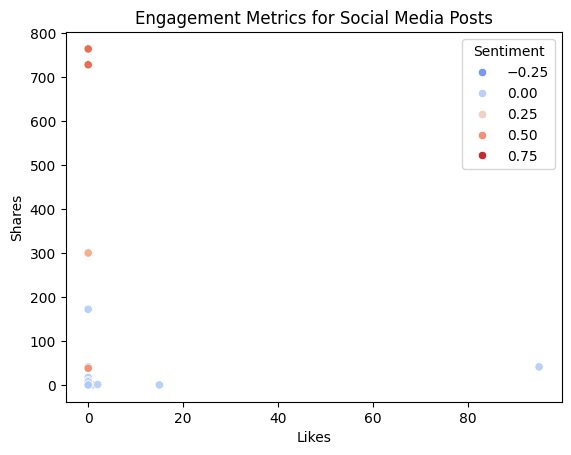

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot likes vs. shares for popular hashtags
sns.scatterplot(data=social_media_df, x="Likes", y="Shares(Retweets)", hue="Sentiment", palette="coolwarm")
plt.title("Engagement Metrics for Social Media Posts")
plt.xlabel("Likes")
plt.ylabel("Shares")
plt.show()


In [ ]:
social_media_df.to_csv("final_social_media_data.csv", index=False)
print("Final dataset saved to final_social_media_data.csv")


Final dataset saved to final_social_media_data.csv
